In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

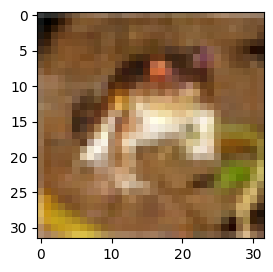

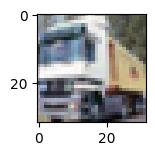

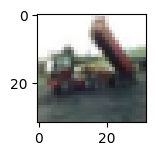

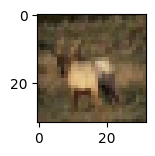

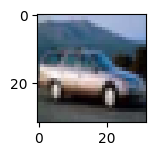

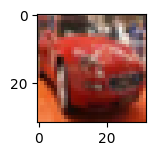

In [2]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [18]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [19]:
train_Y=to_categorical(train_Y)
test_Y=to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [26]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [28]:
from keras.optimizers import SGD

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 67ms/step - accuracy: 0.3036 - loss: 1.9005 - val_accuracy: 0.5003 - val_loss: 1.3706
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.4960 - loss: 1.4058 - val_accuracy: 0.5727 - val_loss: 1.2027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5793 - loss: 1.1796 - val_accuracy: 0.6056 - val_loss: 1.1146
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.6389 - loss: 1.0291 - val_accuracy: 0.6190 - val_loss: 1.0718
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6716 - loss: 0.9342 - val_accuracy: 0.6536 - val_loss: 0.9983
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.7113 - loss: 0.8135 - val_accuracy: 0.6521 - val_loss: 1.0073
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.7465 - loss: 0.7192 - val_accuracy: 0.6547 - val_loss: 1.0399
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.7747

In [31]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6622 - loss: 1.1071
66.25999808311462


In [36]:
model.save("model1_cifar_10epoch.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


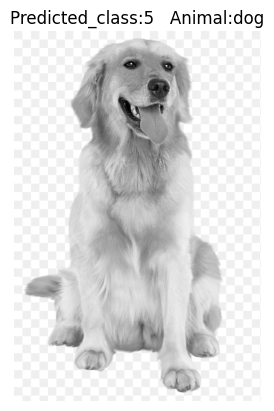

In [57]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
def preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Convert to grayscale if it's not already
    if img.mode != 'L':
        img = img.convert('L')
    
    # Resize to 28x28 pixels
    img = img.resize((28, 28))
    
    # Convert to numpy array and normalize
    img_array = np.array(img).astype('float32') / 255.0
    
    # Reshape to (1, 28, 28, 1) for model input
    img_array = img_array.reshape(1, 28, 28, 1)
    
    return img_array
image_path='dog.png'
im=Image.open(image_path)
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict([im])
pred_class = np.argmax(pred, axis=-1)[0]
import matplotlib.pyplot as plt

# Display the image
i = Image.open(image_path).convert('L')
plt.imshow(i, cmap='gray')
plt.axis('off')
plt.title(f"Predicted_class:{pred_class}   Animal:{results[pred_class]}")
plt.show()